<a href="https://colab.research.google.com/github/agusjanardana/fuzzy-logic/blob/main/tupro2_PAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Inisialisasi kebutuhan library
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('Sudah mengupload file dengan nama "{name}" dan panjang {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving restoran.xlsx to restoran.xlsx
Sudah mengupload file dengan nama "restoran.xlsx" dan panjang 10537 bytes


In [ ]:
dfFuzzy = pd.read_excel(io.BytesIO(uploaded.get('restoran.xlsx')))
dfFuzzy

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [ ]:
dfFuzzy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         100 non-null    int64
 1   pelayanan  100 non-null    int64
 2   makanan    100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


**GRAFIK BATAS FUNGSI KEANGGOTAAN UNTUK PELAYANAN**

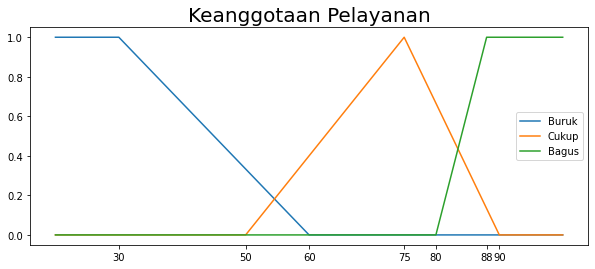

In [ ]:
x1 = [20,30,60,100]
y1 = [1, 1, 0, 0]

x2 = [20,30,50,75,90,100]
y2 = [0,0,0,1,0,0]

x3 = [20,30,50,60,75,80,88,90,100]
y3 = [0,0,0,0,0,0,1,1,1]

plt.figure(figsize=(10,4))
plt.xticks([30,50,60,75,80,88,90])
plt.title("Keanggotaan Pelayanan", fontsize=20)

plt.plot(x1,y1, label='Buruk')
plt.plot(x2,y2, label='Cukup')
plt.plot(x3,y3, label='Bagus')

plt.legend()

**FUZZIFICATION PELAYANAN**




In [ ]:
def pelayanan(x):
  nilaiPelayanan = []
  if (( x>= 0) and (x <= 60 )):
    nilaiPelayanan.append(pelayananBuruk(x))
  if (( x>= 50) and ( x<= 90)):
    nilaiPelayanan.append(pelayananCukup(x))
  if ( x>= 80 ):
    nilaiPelayanan.append(pelayananBagus(x))
  return nilaiPelayanan

In [ ]:
def pelayananBuruk(x):
  if ( x>= 0.0 and x<= 30.0):
    return 'buruk', 1.0
  elif ( x> 30.0 and x <=60.0):
    return 'buruk', ((60.0 - x)/(60.0-30.0))

In [ ]:
def pelayananCukup(x):
  if ( x>= 50.0 and x<= 75.0):
    return 'cukup', ((x-50.0)/(75.0-50.0))
  elif ( x> 75.0 and x <=90.0):
    return 'cukup', ((90.0 - x)/(90.0-75.0))

In [ ]:
def pelayananBagus(x):
  if ( x>= 80.0 and x<= 88.0):
    return 'bagus', ((x-80.0)/(88.0-80.0))
  elif ( x>88.0):
    return 'bagus', 1

**TEST FUZZY PELAYANAN**

In [ ]:
pelayanan(25.5)

[('buruk', 1.0)]

In [ ]:
pelayanan(45)

[('buruk', 0.5)]

In [ ]:
pelayanan(56.0)

[('buruk', 0.13333333333333333), ('cukup', 0.24)]

In [ ]:
pelayanan(78.0)

[('cukup', 0.8)]

In [ ]:
pelayanan(85)

[('cukup', 0.3333333333333333), ('bagus', 0.625)]

In [ ]:
pelayanan(90)

[('cukup', 0.0), ('bagus', 1)]

**GRAFIK KEANGGOTAAN MAKANAN**

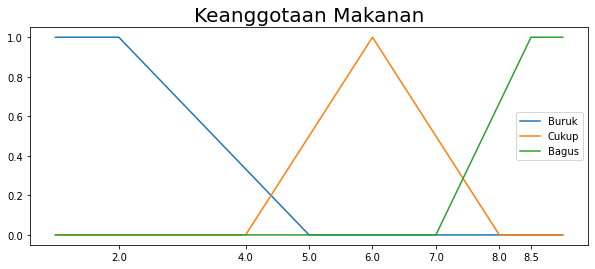

In [ ]:
x1 = [1,2,5,9]
y1 = [1,1,0,0]

x2 = [1,2,4,6,8,9]
y2 = [0,0,0,1,0,0]

x3 = [1,2,4,6,7,8.5,9]
y3 = [0,0,0,0,0,1,1]

plt.figure(figsize=(10,4))
plt.xticks([2,4,5,6,7,8,8.5])
plt.title("Keanggotaan Makanan", fontsize=20)

plt.plot(x1,y1, label='Buruk')
plt.plot(x2,y2, label='Cukup')
plt.plot(x3,y3, label='Bagus')

plt.legend()

**FUZZYFICATION MAKANAN**

In [ ]:
def makanan(x):
  nilaiMakanan = []
  if (( x>= 0) and (x <= 5 )):
    nilaiMakanan.append(makananBuruk(x))
  if (( x>= 4) and ( x<= 8)):
    nilaiMakanan.append(makananCukup(x))
  if ( x>= 7 ):
    nilaiMakanan.append(makananBagus(x))
  return nilaiMakanan

In [ ]:
def makananBuruk(x):
  if ( x>= 0.0 and x<= 2.0):
    return 'buruk', 1.0
  elif ( x> 2.0 and x <=5.0):
    return 'buruk', ((5.0 - x)/(5.0-2.0))

In [ ]:
def makananCukup(x):
  if ( x>= 4.0 and x<= 6.0):
    return 'cukup', ((x-4.0)/(6.0-4.0))
  elif ( x> 6.0 and x <=8.0):
    return 'cukup', ((8.0 - x)/(8.0-6.0))

In [ ]:
def makananBagus(x):
  if ( x>= 7.0 and x<= 8.5):
    return 'bagus', ((x-7.0)/(8.5-7.0))
  elif ( x>8.5):
    return 'bagus', 1

**TEST FUZZY MAKANAN**

In [ ]:
makanan(1.5)

[('buruk', 1.0)]

In [ ]:
makanan(3)

[('buruk', 0.6666666666666666)]

In [ ]:
makanan(5)

[('buruk', 0.0), ('cukup', 0.5)]

In [ ]:
makanan(7)

[('cukup', 0.5), ('bagus', 0.0)]

In [ ]:
makanan(7.5)

[('cukup', 0.25), ('bagus', 0.3333333333333333)]

In [ ]:
makanan(9)

[('bagus', 1)]

In [ ]:
def inference(pelayanan, makanan):
    if (pelayanan=='buruk' and makanan=='buruk') :
        return 'tidak layak'
    if (pelayanan=='buruk' and makanan=='cukup') :
        return 'tidak layak'
    if (pelayanan=='buruk' and makanan=='bagus') :
        return 'layak'
    if (pelayanan=='cukup' and makanan=='buruk') :
        return 'tidak layak'
    if (pelayanan=='cukup' and makanan=='cukup') :
        return 'layak'
    if (pelayanan=='cukup' and makanan=='bagus') :
        return 'layak'
    if (pelayanan=='bagus' and makanan=='buruk') :
        return 'tidak layak'
    if (pelayanan=='bagus' and makanan=='cukup') :
        return 'layak'
    if (pelayanan=='bagus' and makanan=='bagus') :
        return 'layak'

In [ ]:
def nilaiInference(Pelayanan, Makanan):
    maksLayak = 0.0
    maksNotLayak = 0.0
    for i in pelayanan(Pelayanan):
        for j in makanan(Makanan):
            if (inference(i[0],j[0])=='layak') :
                if (maksLayak < min(i[1],j[1])) :
                    maksLayak = min(i[1],j[1])
            if (inference(i[0],j[0])=='tidak layak') :
                if (maksNotLayak < min(i[1],j[1])):
                    maksNotLayak = min(i[1],j[1])
    return ('layak', maksLayak) , ('tidak layak', maksNotLayak)

In [ ]:
pelayanan(78)

[('cukup', 0.8)]

In [ ]:
makanan(7.5)

[('cukup', 0.25), ('bagus', 0.3333333333333333)]

In [ ]:
nilaiInference(78, 7.5)

(('layak', 0.3333333333333333), ('tidak layak', 0.0))

**GRAFIK SUGENO**

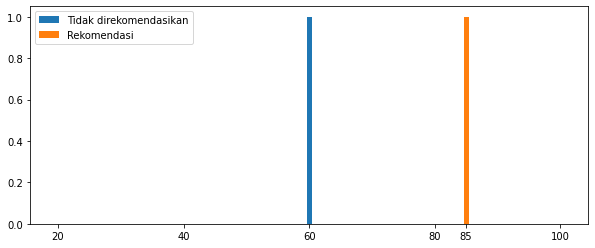

In [ ]:
x1 = [20,40,60,80,85,100]
y1 = [0,0,1,0,0,0]

x2 = [20,40,60,80,85,100]
y2 = [0,0,0,0,1,0]

plt.figure(figsize=(10,4))
plt.xticks([20,40,60,80,85,100])

plt.bar(x1,y1,linewidth=1, label="Tidak direkomendasikan")
plt.bar(x2,y2,linewidth=1, label="Rekomendasi")

plt.legend()

In [ ]:
#Sugeno
def sugeno(x,y):
  hasil=((x*40) + (y*85))/(x+y)
  return hasil

In [ ]:
sugeno(35,2)

42.432432432432435

In [ ]:
sugeno(100,9)

43.71559633027523

In [ ]:
dfFuzzy

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [ ]:
saves = []

for i in dfFuzzy.iterrows():
  arr_sugeno= nilaiInference(i[1].loc['pelayanan'], i[1].loc['makanan'])
  saves.append(sugeno(arr_sugeno[0][1], arr_sugeno[1][1]))
print(saves)

[47.75862068965518, 85.0, 85.0, 85.0, 85.0, 40.0, 40.0, 40.0, 85.0, 40.0, 85.0, 85.0, 85.0, 40.0, 40.0, 40.0, 85.0, 40.0, 85.0, 40.0, 85.0, 40.0, 85.0, 40.0, 40.0, 85.0, 40.0, 85.0, 40.0, 85.0, 40.0, 85.0, 40.0, 85.0, 85.0, 85.0, 85.0, 85.0, 74.61538461538461, 85.0, 85.0, 40.0, 85.0, 85.0, 40.0, 85.0, 85.0, 85.0, 85.0, 85.0, 40.0, 85.0, 85.0, 40.0, 85.0, 85.0, 85.0, 85.0, 85.0, 40.0, 85.0, 85.0, 40.0, 85.00000000000001, 40.0, 40.0, 85.0, 43.813559322033896, 40.0, 40.0, 85.0, 85.0, 40.0, 85.0, 85.0, 85.0, 40.0, 85.0, 40.0, 40.0, 40.0, 85.0, 40.0, 85.0, 85.0, 85.0, 85.0, 40.0, 85.0, 85.0, 85.0, 85.0, 40.0, 85.0, 40.0, 85.0, 85.0, 40.0, 85.0, 40.0]


In [ ]:
NilaiTerbaik = sorted(zip(dfFuzzy.id,saves), key=lambda x:x[1], reverse=True)
print(NilaiTerbaik)

[(64, 85.00000000000001), (2, 85.0), (3, 85.0), (4, 85.0), (5, 85.0), (9, 85.0), (11, 85.0), (12, 85.0), (13, 85.0), (17, 85.0), (19, 85.0), (21, 85.0), (23, 85.0), (26, 85.0), (28, 85.0), (30, 85.0), (32, 85.0), (34, 85.0), (35, 85.0), (36, 85.0), (37, 85.0), (38, 85.0), (40, 85.0), (41, 85.0), (43, 85.0), (44, 85.0), (46, 85.0), (47, 85.0), (48, 85.0), (49, 85.0), (50, 85.0), (52, 85.0), (53, 85.0), (55, 85.0), (56, 85.0), (57, 85.0), (58, 85.0), (59, 85.0), (61, 85.0), (62, 85.0), (67, 85.0), (71, 85.0), (72, 85.0), (74, 85.0), (75, 85.0), (76, 85.0), (78, 85.0), (82, 85.0), (84, 85.0), (85, 85.0), (86, 85.0), (87, 85.0), (89, 85.0), (90, 85.0), (91, 85.0), (92, 85.0), (94, 85.0), (96, 85.0), (97, 85.0), (99, 85.0), (39, 74.61538461538461), (1, 47.75862068965518), (68, 43.813559322033896), (6, 40.0), (7, 40.0), (8, 40.0), (10, 40.0), (14, 40.0), (15, 40.0), (16, 40.0), (18, 40.0), (20, 40.0), (22, 40.0), (24, 40.0), (25, 40.0), (27, 40.0), (29, 40.0), (31, 40.0), (33, 40.0), (42, 40

In [ ]:
RestoranBest =[]
for i in range(10):
  RestoranBest.append(NilaiTerbaik[i])
print(RestoranBest)

[(64, 85.00000000000001), (2, 85.0), (3, 85.0), (4, 85.0), (5, 85.0), (9, 85.0), (11, 85.0), (12, 85.0), (13, 85.0), (17, 85.0)]


In [ ]:
data_final = pd.DataFrame(RestoranBest, columns = ['id','nilai'])
data_final

,id,nilai
0,64,85.0
1,2,85.0
2,3,85.0
3,4,85.0
4,5,85.0
5,9,85.0
6,11,85.0
7,12,85.0
8,13,85.0
9,17,85.0


In [ ]:
pd.DataFrame(data_final).to_excel('peringkat.xls', header=True, index=False)

In [ ]:
peringkat = pd.read_excel('peringkat.xls')
peringkat

,id,nilai
0,64,85.0
1,2,85.0
2,3,85.0
3,4,85.0
4,5,85.0
5,9,85.0
6,11,85.0
7,12,85.0
8,13,85.0
9,17,85.0
